# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Get and Explore the Data](#2.-Get-and-Explore-the-Data)
    * [2.1. Price History and Events Affecting It](#2.1.-Price-History-and-Events-Affecting-It)
    * [2.2. Financial Information](#2.2.-Financial-Information)
    * [2.3. Comparing with Other Stocks and Indexes](#2.3.-Comparing-with-Other-Stocks-and-Indexes)
* [3. Making Long Term Predictions](#3.-Making-Long-Term-Predictions)
* [4. Short Term Investing](#4.-Short-Term-Investing)
    * [4.1. Making Short Term Predictions](#4.1.-Making-Short-Term-Predictions)
    * [4.2. Investing in the Best Performing Stocks](#4.2.-Investing-in-the-Best-Performing-Stocks)
        * [4.2.1. Finding the Best Performing Stock](#4.2.1.-Finding-the-Best-Performing-Stock)
        * [4.2.2. Backtesting](#4.2.2.-Backtesting)
* [5. Conclusion](#5.-Conclusion)
* [6. References](#6.-References)
* [7. Appendix](#7.-Appendix)

# 1. Introduction

For a variety of reasons (i.e., coronavirus, changes in the international situation), stock markets have been particularly volatile in recent years, which means that models that predict prices based on outdated historical data may no longer be available: COVID-19 showed a huge impact on energy prices (Štifanić et al., 2020).

Secondly, most of the past stock price prediction research is to predict a series of stock portfolios, like S & P 500, which can only be used to narrow the range of stock selection but cannot determine which specific stock we choose.  

Therefore, we plan in this report to impersonate an investment firm specializing in the healthcare sector. COVID-19 has brought a huge impact on stock markets and our goal is to measure its impact in healthcare’s financial department. By using data from pharmaceutical companies (Pfizer being our focus), we aim at building a machine learning model able to draw short-term as well as long-term predictions and eventually find new ways to invest. Through this mean, we will be able to compare results and make better data-driven decision for our stocks in this mid/post-pandemic era.

In [1]:
# for data manipulation
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

# for accessing stock market data
import yfinance as yf

# for visualizations
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt

# for predictions
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# 2. Get and Explore the Data

To make the best predictions, we need the most accurate data, which is the most recent data. Yahoo Finance is the perfect place to get live data on countless companies but unfortunately their official API has been decommissioned in 2017 following wide-spread misuse of data (Bland, 2020).
In encountering this issue, we are using ‘yfinance’, an open-source library to access and retrieve Yahoo Finance’s latest data in order to get the most up-to-date information.

The data and predictions we present in this report have been filtered, scrapped, and modelled ourselves and therefore does not require any data cleaning. To comprehensively explain how stocks evolved over time, we got data from several decades back all the way to today, using different comparison scopes like years, months (and even days).

We used two of the library’s modules, ‘yf.Tickers’ for most methods and ‘yf.download’ to download historical data of multiple companies at once.

## 2.1. Price History and Events Affecting It

Next, we explore the data. We get the data from Pfizer and call it 'pfe'.

In [2]:
# constructing a yfinance object
pfe = yf.Ticker("PFE")
pfe

yfinance.Ticker object <PFE>

We then look at global information related to the pharmaceutical company and put in dataframes for a better understanding. We can see the OHLC chart with the Opening, High, Low and Closing stock prices for Pfizer.

In [3]:
# getting the daily stock price of Pfizer from the the company's IPO
pfizer = pfe.history(period = "max", interval = "1d")
pfizer

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-06-01,0.000000,0.182306,0.179544,0.182306,2458771,0.0,0.0
1972-06-02,0.182306,0.182858,0.179544,0.180096,1613885,0.0,0.0
1972-06-05,0.180096,0.180649,0.178439,0.179544,2585251,0.0,0.0
1972-06-06,0.179544,0.184516,0.178991,0.183411,2347469,0.0,0.0
1972-06-07,0.183411,0.183411,0.180649,0.183411,1032077,0.0,0.0
...,...,...,...,...,...,...,...
2022-01-14,54.980000,55.380001,54.509998,54.950001,27060000,0.0,0.0
2022-01-18,54.500000,54.549999,53.430000,54.110001,35598000,0.0,0.0
2022-01-19,53.650002,54.490002,53.450001,53.540001,27300400,0.0,0.0


Text(2019-11-01, 20, '')

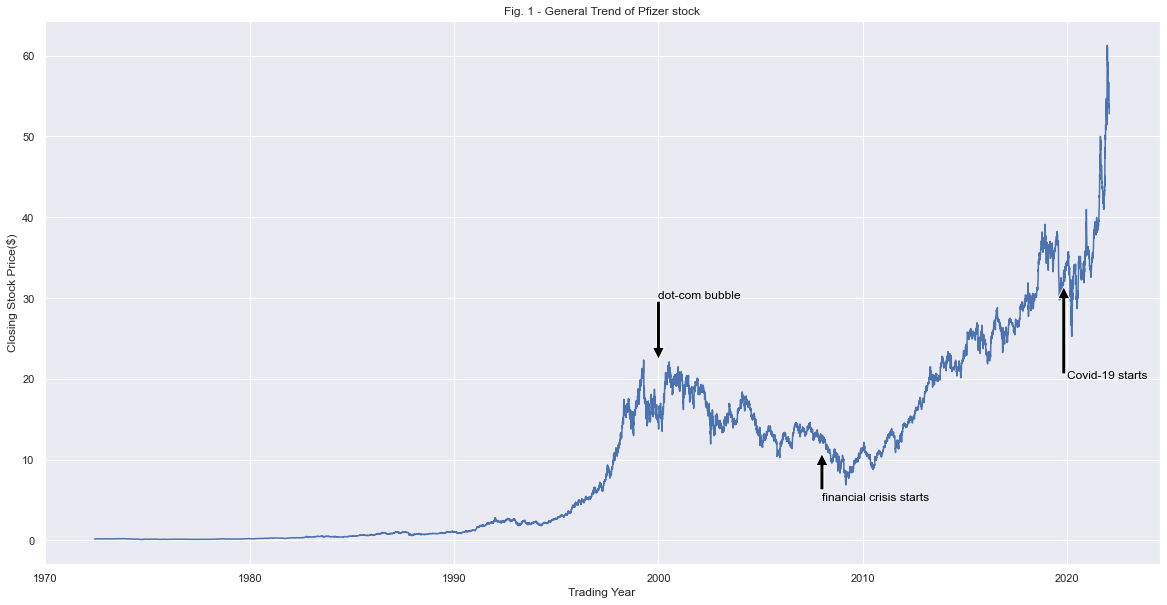

In [4]:
sns.set(rc = {"figure.figsize" : (20, 10)})
ax = sns.lineplot(x = pfizer.index, y = pfizer.Close)
ax.set(xlabel='Trading Year',
       ylabel='Closing Stock Price($)',
       title='Fig. 1 - General Trend of Pfizer stock')

plt.text(dt.date(2000,1,1), 30, "dot-com bubble", horizontalalignment='left', size='medium', color='black', weight='normal')
ax.annotate("",
            xy=(dt.date(2000,1,1), 22), xycoords='data',
            xytext=(dt.date(2000,1,1), 30), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.text(dt.date(2008,1,1), 5, "financial crisis starts", horizontalalignment='left', size='medium', color='black', weight='normal')
ax.annotate("",
            xy=(dt.date(2008,1,1), 11), xycoords='data',
            xytext=(dt.date(2008,1,1), 6), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.text(dt.date(2020,1,1), 20, "Covid-19 starts", horizontalalignment='left', size='medium', color='black', weight='normal')
ax.annotate("",
            xy=(dt.date(2019,11,1), 32), xycoords='data',
            xytext=(dt.date(2019,11,1), 20), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

Here we have the global line of Pfizer's stock prices over the decades, since the launch for their IPO in 1972 to today (Figure 1.). We will later apply a closer scope as we are especially interested in the stock prices relating to the COVID-19 pandemic, however the aim of this graph is to give us a general idea of the company's trends and how it has been performing in the past.

We note how some key world events reflect on the stock price for Pfizer. We see that the dot com bubble which saw the rapid rise in stock equity valuations in 2000 pushed the stock prices up for Pfizer too. The financial crisis in 2008 saw the stock markets crash and this is evident from Pfizer's stock trend as well. 2020 marked the beginning of the covid19-era and we can see a sharp drop in the price for Pfizer stocks. For the period between 2020 and 2021 we see fluctuations in the graph, and we will deep dive into this period to see how Pfizer's work on covid-19 vaccines affect its stock price.

<function matplotlib.pyplot.show(close=None, block=None)>

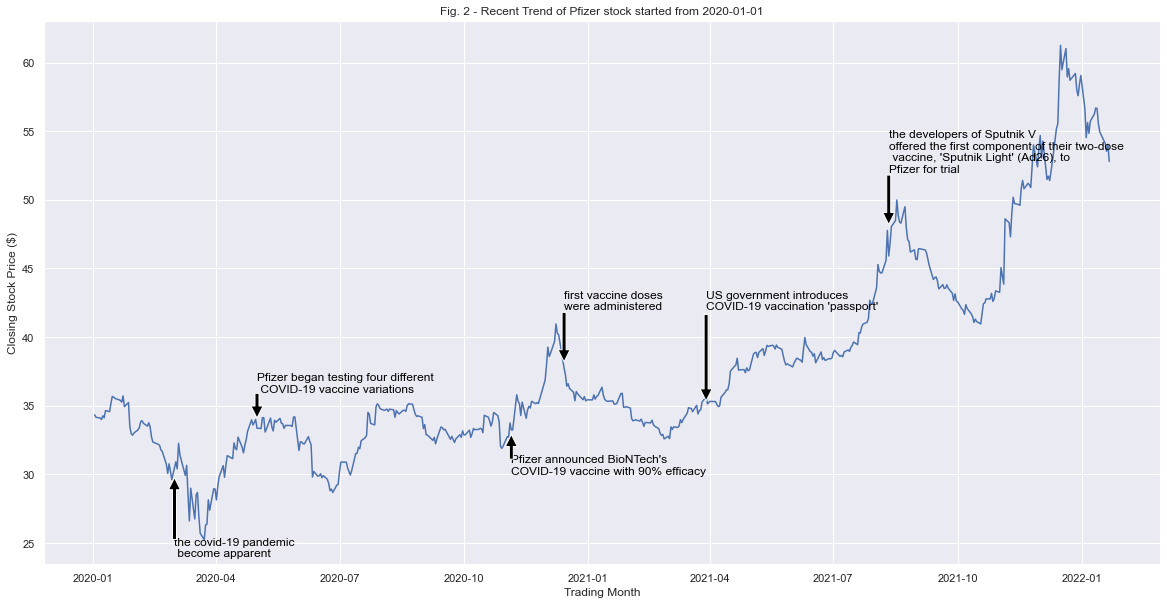

In [5]:
# getting the daily stock price of Pfizer from the beginning of 2020
pfizer = pfe.history(start = "2020-01-01", interval = "1d")

rce = sns.set(rc = {"figure.figsize" : (20, 10)})
rce = sns.lineplot(x = pfizer.index, y = pfizer.Close)

rce.set(xlabel='Trading Month',
              ylabel='Closing Stock Price ($)',
              title='Fig. 2 - Recent Trend of Pfizer stock started from 2020-01-01')
plt.text(dt.date(2020,3,1), 24, "the covid-19 pandemic\n become apparent", horizontalalignment='left', size='medium', color='black', weight='normal')
plt.text(dt.date(2020,5,1), 36, "Pfizer began testing four different \n COVID-19 vaccine variations", horizontalalignment='left', size='medium', color='black', weight='normal')
plt.text(dt.date(2020,11,5), 30, "Pfizer announced BioNTech's \nCOVID-19 vaccine with 90% efficacy", horizontalalignment='left', size='medium', color='black', weight='normal')
plt.text(dt.date(2020,12,14), 42, "first vaccine doses \nwere administered", horizontalalignment='left', size='medium', color='black', weight='normal')
plt.text(dt.date(2021,3,29), 42, "US government introduces \nCOVID-19 vaccination 'passport'", horizontalalignment='left', size='medium', color='black', weight='normal')
plt.text(dt.date(2021,8,11), 52, "the developers of Sputnik V \noffered the first component of their two-dose\n vaccine, 'Sputnik Light' (Ad26), to \nPfizer for trial", horizontalalignment='left', size='medium', color='black', weight='normal')

rce.annotate("",
            xy=(dt.date(2020,3,1), 30), xycoords='data',
            xytext=(dt.date(2020,3,1), 25), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

rce.annotate("",
            xy=(dt.date(2020,5,1), 34), xycoords='data',
            xytext=(dt.date(2020,5,1), 36), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

rce.annotate("",
            xy=(dt.date(2020,11,5), 33), xycoords='data',
            xytext=(dt.date(2020,11,5), 31), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

rce.annotate("",
            xy=(dt.date(2020,12,14), 38), xycoords='data',
            xytext=(dt.date(2020,12,14), 42), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

rce.annotate("",
            xy=(dt.date(2021,3,29), 35), xycoords='data',
            xytext=(dt.date(2021,3,29), 42), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
rce.annotate("",
            xy=(dt.date(2021,8,11), 48), xycoords='data',
            xytext=(dt.date(2021,8,11), 52), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.show

In the above graph (Fig. 2), we are observing the different vaccine related announcements made in the period 2020-2021 and how these events impacted the stock price for Pfizer. As we can see from the graph these events included announcements from governments around the world and other vaccine companies. It is intuitive that stock prices are not just affected by a company’s own performance and innovations but are also strongly affected by what is happening around the world and within their competitors.

## 2.2. Financial Information

In [6]:
pfe.info

{'zip': '10017',
 'sector': 'Healthcare',
 'fullTimeEmployees': 78500,
 'longBusinessSummary': 'Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products worldwide. It offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic and pain under the Eliquis, Chantix/Champix, and Premarin family brands; biologics, small molecules, immunotherapies, and biosimilars under the Ibrance, Xtandi, Sutent, Inlyta, Retacrit, Lorbrena, and Braftovi brands; and sterile injectable and anti-infective medicines under the Sulperazon, Medrol, Zithromax, Vfend, and Panzyga brands. The company also provides medicines and vaccines in various therapeutic areas, such as pneumococcal disease, meningococcal disease, tick-borne encephalitis, and COVID-19 under the Prevnar 13/Prevenar 13 (pediatric/adult), Nimenrix, FSME/IMMUN-TicoVac, Trumenba, and the Pfizer-BioNTech COVID-19 vaccine brands; biosimilars for chronic immune and infla

Here, we are given basic information about Pfizer in order to have an idea about its background: the healthcare company is located in New York, USA and includes around 78500 ful-time employees. Pfizer can be considered 'doing good' at the moment as they have a positive revenue growth (1.344%) and earnings growth (4.468%).

In [7]:
pfe.major_holders

,0,1
0,0.04%,% of Shares Held by All Insider
1,67.50%,% of Shares Held by Institutions
2,67.53%,% of Float Held by Institutions
3,3535,Number of Institutions Holding Shares


Most of Pfizer's shares are held by institutions, which is a good sign. It is good for a company to have big institutions like investment banks and mutual or pension funds do the moves with the shares on the market (Lander, 2013).

Text(0, 0.5, 'Shares (in millions)')

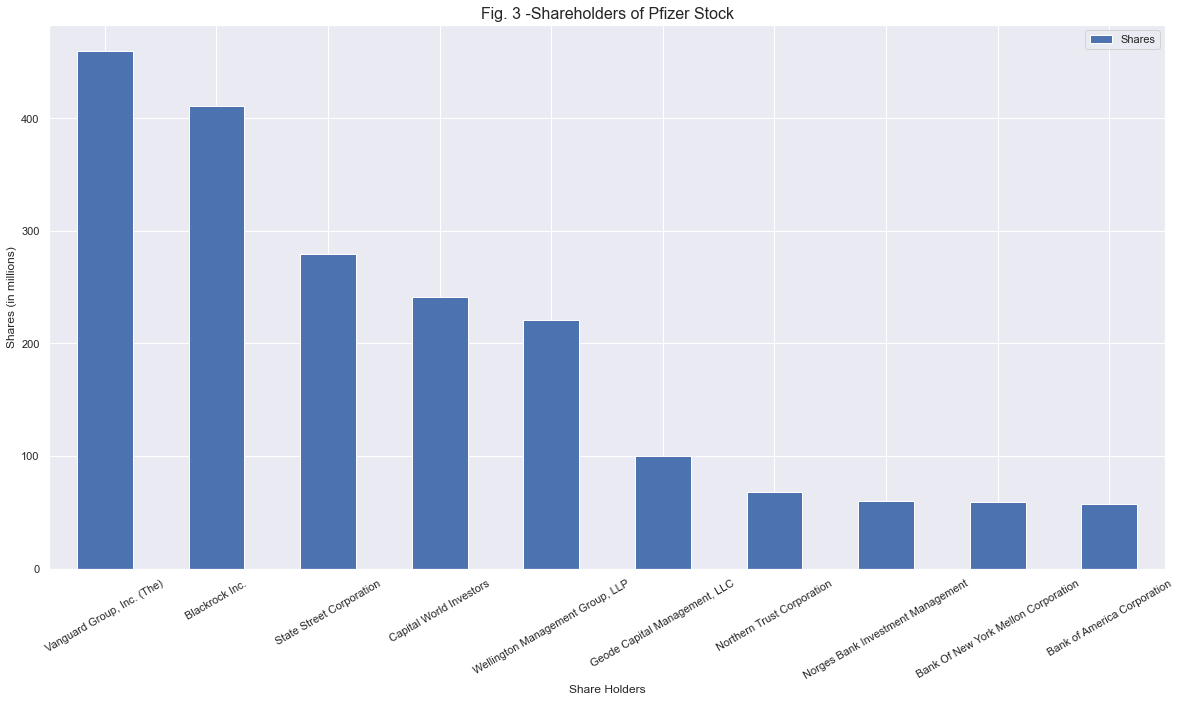

In [8]:
ih = pfe.institutional_holders
ih['Shares'] = ih['Shares']/1000000

ih = ih.iloc[:,0:2]
ih = ih.set_index("Holder")


ih.plot(kind = 'bar')
plt.xticks(rotation=30)
plt.title('Fig. 3 -Shareholders of Pfizer Stock',fontsize=16)
plt.xlabel('Share Holders')
plt.ylabel('Shares (in millions)')

This barchart (Fig. 3) shows which are the institutions holding the company's shares at the moment. We observe that the companies owning the biggest shares are specialized in investment advising and risk management.

In [9]:
pfe.balance_sheet

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Intangible Assets,2.847100e+10,3.393600e+10,3.521100e+10,4.874100e+10
Capital Surplus,8.867400e+10,8.742800e+10,8.625300e+10,8.427800e+10
Total Liab,9.075600e+10,1.041480e+11,9.566400e+10,1.001410e+11
Total Stockholder Equity,6.323800e+10,6.312600e+10,6.338800e+10,7.128700e+10
Minority Interest,2.350000e+08,3.030000e+08,3.510000e+08,3.480000e+08
Other Current Liab,1.207600e+10,1.167200e+10,1.221200e+10,1.043500e+10
Total Assets,1.542290e+11,1.675940e+11,1.594220e+11,1.717970e+11
Common Stock,4.700000e+08,4.680000e+08,4.670000e+08,4.640000e+08
Other Current Assets,3.588000e+09,6.528000e+09,1.208900e+10,2.197000e+09
Retained Earnings,9.677000e+10,9.767000e+10,8.955400e+10,8.529100e+10


This is Pfizer's balance sheet for the past 4 years. We are hoping to correlate some of these numbers with their stock price trends.

In [10]:
pfe.financials

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Research Development,8879000000.0,7731000000.0,7713000000.0,7645000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,7498000000.0,11485000000.0,3595000000.0,12304000000.0
Minority Interest,235000000.0,303000000.0,351000000.0,348000000.0
Net Income,9616000000.0,16273000000.0,11153000000.0,21308000000.0
Selling General Administrative,10890000000.0,12557000000.0,12149000000.0,14606000000.0
Gross Profit,33334000000.0,33129000000.0,31953000000.0,41720000000.0
Ebit,10129000000.0,8379000000.0,7355000000.0,14711000000.0
Operating Income,10129000000.0,8379000000.0,7355000000.0,14711000000.0
Other Operating Expenses,NaN,NaN,-1002000000.0,-1002000000.0


From this financial report, we see that Pfizer has been investing more (around 114M ) in the year 2020 that in its past years. Without making assumptions, it is likely that this increase has been consecrated in relation with the COVID-19 vaccine development.

In [11]:
pfe.cashflow

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Investments,-1.672000e+09,9.304000e+09,6.434000e+09,-2.194000e+09
Change To Liabilities,3.530000e+08,-3.400000e+08,4.040000e+08,4.600000e+07
Total Cashflows From Investing Activities,-4.271000e+09,-3.945000e+09,4.525000e+09,-4.740000e+09
Net Borrowings,-1.275500e+10,8.764000e+09,-9.350000e+08,-9.410000e+08
Total Cash From Financing Activities,-9.649000e+09,-8.485000e+09,-2.044100e+10,-1.335000e+10
Change To Operating Activities,1.357000e+09,-1.393000e+09,1.520000e+08,1.386000e+09
Issuance Of Stock,4.250000e+08,3.940000e+08,1.259000e+09,8.620000e+08
Net Income,9.616000e+09,1.627300e+10,1.115300e+10,2.130800e+10
Change In Cash,4.750000e+08,1.250000e+08,-2.050000e+08,-1.235000e+09
Effect Of Exchange Rate,-8.000000e+06,-3.200000e+07,-1.160000e+08,5.300000e+07


From this cashflow dataframe, we observe that the net income for 2020 is much higher compared to other years. This could be correlated with the release of Pfizer's vaccine.

In [12]:
recommendations = pfe.recommendations
recommendations.head()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-27 06:10:00,Goldman Sachs,Buy,,main
2012-04-02 05:52:00,Citigroup,Neutral,,main
2012-04-09 16:25:00,ISI Group,Buy,,init
2012-07-13 06:54:00,Jefferies,Buy,,main
2012-07-18 06:04:00,Morgan Stanley,Overweight,,main


In [13]:
# grouping by recommendation and counting the number of firms
recommendations_by_grade = recommendations.groupby("To Grade")[["Firm"]].count().reset_index()
recommendations_by_grade.columns = ["grade", "number_of_firms"]
recommendations_by_grade = recommendations_by_grade.set_index("grade")
recommendations_by_grade = recommendations_by_grade.sort_values("number_of_firms", ascending = False)

recommendations_by_grade

,number_of_firms
grade,
Buy,46
Overweight,21
Neutral,20
Outperform,19
Market Perform,18
Equal-Weight,16
Hold,7
Sell,3
Sector Perform,2



Exploring above what yfinance recommends for trading stocks. We are going to build our own model and see how it performs. 

## 2.3. Comparing with Other Stocks and Indexes

As Pfizer is part of the Standard and Poors 500 index (S&P 500 for short), we are including it in this report. The S&P tracks the performance of 500 large companies' on stock exchanges in the United States (Wikipedia Contributors, 2021).

In [14]:
#the ticker symbol of S&P is "^GSPC"
gspc = yf.Ticker("^GSPC")
gspc

yfinance.Ticker object <^GSPC>

We take data from S&P using Pfizer's IPO.

In [15]:
pfizer = pfe.history(period = "max", interval = "1d")

# getting the S&P index from the day of the IPO of Pfizer
sp = gspc.history(start = "1972-06-01", interval = "1d")

# merging the the Pfizer and S&P dataframes
pfizer_sp = pd.merge(pfizer[["Close"]].reset_index(), sp[["Close"]].reset_index(), on = "Date")
pfizer_sp.columns = ["date", "pfizer", "sp"]
pfizer_sp.head()

,date,pfizer,sp
0,1972-06-01,0.182306,109.690002
1,1972-06-02,0.180096,109.730003
2,1972-06-05,0.179544,108.820000
3,1972-06-06,0.183411,108.209999
4,1972-06-07,0.183411,107.650002


Text(0, 0.5, 'Pfizer Closing Stock Price($)')

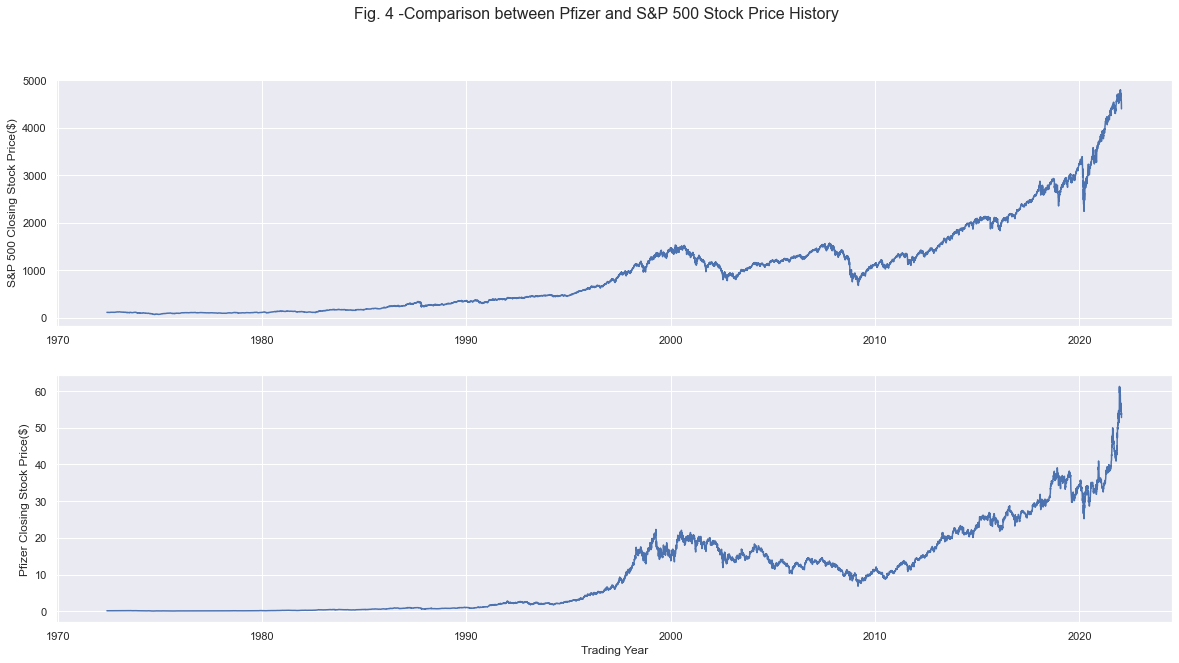

In [16]:
fig, (axes1,axes2) = plt.subplots(2, 1)
fig.suptitle('Fig. 4 -Comparison between Pfizer and S&P 500 Stock Price History',fontsize=16)

axes1.plot("date", "sp", data = pfizer_sp)
axes1.set_ylabel("S&P 500 Closing Stock Price($)")

axes2.plot("date", "pfizer", data = pfizer_sp)
axes2.set_xlabel("Trading Year")
axes2.set_ylabel("Pfizer Closing Stock Price($)")

Here are two graphs (Fig 4.) comparing the S&P stock prices trend line (first graph) and Pfizer's stock trend line (second graph) from 1970 to today.
As we can observe, they are very similar which is due to Pfizer being part of S&P and hence follows the financial index, while showing a higher volatility. An index leads and follows global trends but does not generally change drastically over a short time period as a single company can.

Likewise, we will now compare with BioNTech, because they made the vaccine together

In [17]:
# Checking if the data is loading and retrieved properly

bntx = yf.Ticker("BNTX")

# getting the BioNTech stock price from the beginning of 2020
biontech = bntx.history(start = "2020-01-01", interval = "1d")

# merging the the Pfizer and BioNTech dataframes
pfizer_biontech = pd.merge(pfizer[["Close"]].reset_index(), biontech[["Close"]].reset_index(), on = "Date")
pfizer_biontech.columns = ["date", "pfizer", "biontech"]
pfizer_biontech.head()

,date,pfizer,biontech
0,2020-01-02,34.333912,38.500000
1,2020-01-03,34.149712,40.049999
2,2020-01-06,34.105850,44.580002
3,2020-01-07,33.991810,43.340000
4,2020-01-08,34.263744,45.099998


Text(0, 0.5, 'Pfizer Closing Stock Price($)')

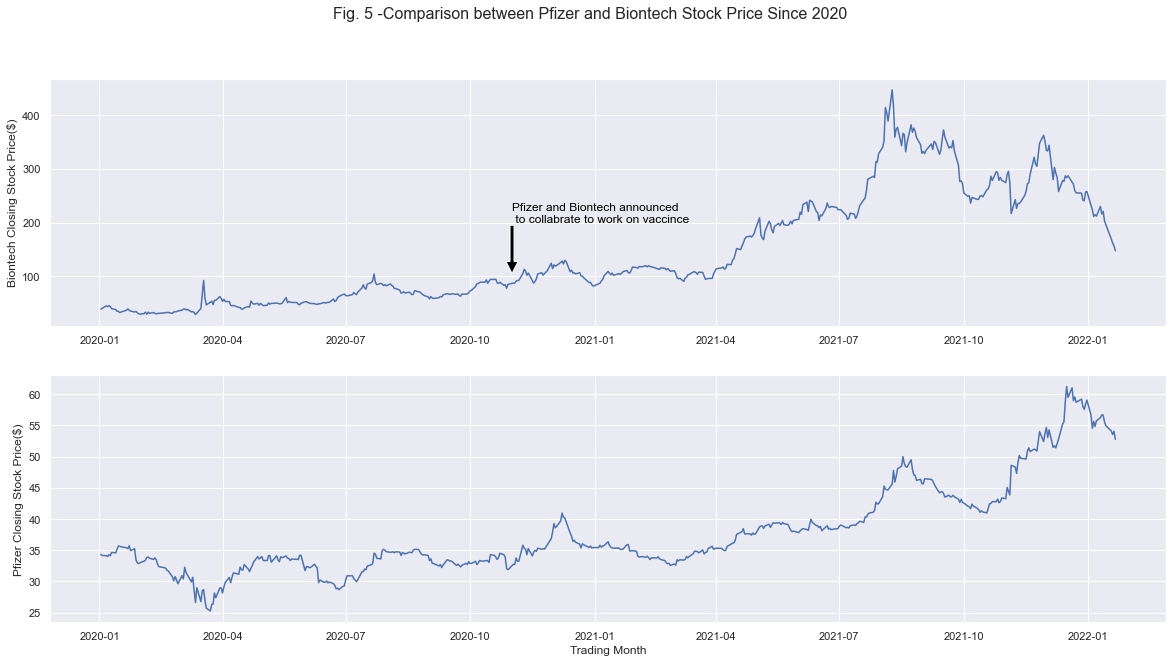

In [18]:
fig, (axes3,axes4) = plt.subplots(2, 1)
fig.suptitle('Fig. 5 -Comparison between Pfizer and Biontech Stock Price Since 2020',fontsize=16)

axes3.plot("date", "biontech", data = pfizer_biontech)
axes3.set_ylabel("Biontech Closing Stock Price($)")
axes3.text(dt.date(2020,11,1), 200, "Pfizer and Biontech announced \n to collabrate to work on vaccince", horizontalalignment='left', size='medium', color='black', weight='normal')
axes3.annotate("",
            xy=(dt.date(2020,11,1), 100), xycoords='data',
            xytext=(dt.date(2020,11,1), 200), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

axes4.plot("date", "pfizer", data = pfizer_biontech)
axes4.set_xlabel("Trading Month")
axes4.set_ylabel("Pfizer Closing Stock Price($)")

In the graphs above(Fig. 5) we have compared the stock prices for BioNtech and Pfizer for the period of 2020-2021.In November 2020, Pfizer and BioNTech
announced a collaboration to work on the Covid-19 vaccine.From the graph above we can see this clearly impacted the stock prices for BioNtech which picked up instantly after
the announcement.Interestingly from here one we see their stock price follows pretty much a similar trend.

## 3. Making Long Term Predictions

In an attempt to develop a model that could capture seasonality in time-series data, Facebook recently developed Prophet. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.

The mathematical equation behind the Prophet model is defined as:

y(t) = g(t) + s(t) + h(t) + e(t)

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.
s(t): periodic changes.
h(t): effects of holidays (recall: Holidays impact businesses).
e(t): error term.

By the use of Prophet, we will be making predictions for a month after gaining access to the company's daily stock price from its IPO.
To test the performance of the algorithm, we split the dataset into train and test, with the test dataset involving data of just the last month.

In [19]:
# getting the company's stock price and renaming the columns for prophet to be able to recognize them
pfizer = pfe.history(period = "max", interval = "1d")["Close"].reset_index().rename(columns = {"Date" : "ds", "Close" : "y"})

In [20]:
# getting the company's stock price for the last year
pfizer_test = pfe.history(period = "1y", interval = "1d")["Close"].reset_index().rename(columns = {"Date" : "ds", "Close" : "y"})
pfizer_test

,ds,y
0,2021-01-22,35.173748
1,2021-01-25,35.876259
2,2021-01-26,35.905136
3,2021-01-27,34.875423
4,2021-01-28,34.885155
...,...,...
248,2022-01-14,54.950001
249,2022-01-18,54.110001
250,2022-01-19,53.540001
251,2022-01-20,54.049999


In [21]:
# getting the company's stock price up to the beginning of last year
pfizer_train = pfizer[pfizer["ds"] < min(pfizer_test["ds"])]
pfizer_train

,ds,y
0,1972-06-01,0.182306
1,1972-06-02,0.180096
2,1972-06-05,0.179544
3,1972-06-06,0.183411
4,1972-06-07,0.183411
...,...,...
12262,2021-01-14,35.366219
12263,2021-01-15,35.318104
12264,2021-01-19,35.346973
12265,2021-01-20,35.125633


In [22]:
# making the model and setting parameters to include daily seasonality and to determine how much the trend changes at the trend changepoints
m = Prophet(daily_seasonality = True, changepoint_prior_scale = 0.01)

In [23]:
# fitting the train data
m.fit(pfizer_train)

In [24]:
# getting the dates of the last year
last_year = m.make_future_dataframe(periods = 365)
last_year = last_year[-365:]

#predicting the stock price of the last year
pfizer_pred = m.predict(last_year)

# Filtering the predictions dataset for the days that the stock exchange was open
pfizer_pred = pd.merge(pfizer_test["ds"], pfizer_pred, how = "left")
pfizer_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,37.075331,35.383434,38.727942,37.075331,37.075331,-0.030899,-0.030899,-0.030899,-0.071454,-0.071454,-0.071454,-0.000566,-0.000566,-0.000566,0.041121,0.041121,0.041121,0.0,0.0,0.0,37.044432
1,2021-01-25,37.095242,35.424768,38.797894,37.095242,37.095242,-0.043081,-0.043081,-0.043081,-0.071454,-0.071454,-0.071454,-0.004429,-0.004429,-0.004429,0.032802,0.032802,0.032802,0.0,0.0,0.0,37.052161
2,2021-01-26,37.101878,35.473665,38.747502,37.101878,37.101878,-0.049198,-0.049198,-0.049198,-0.071454,-0.071454,-0.071454,-0.008134,-0.008134,-0.008134,0.030390,0.030390,0.030390,0.0,0.0,0.0,37.052680
3,2021-01-27,37.108515,35.397440,38.823823,37.108515,37.108515,-0.041944,-0.041944,-0.041944,-0.071454,-0.071454,-0.071454,0.001167,0.001167,0.001167,0.028343,0.028343,0.028343,0.0,0.0,0.0,37.066571
4,2021-01-28,37.115152,35.421690,38.668346,37.115152,37.115152,-0.050594,-0.050594,-0.050594,-0.071454,-0.071454,-0.071454,-0.005902,-0.005902,-0.005902,0.026762,0.026762,0.026762,0.0,0.0,0.0,37.064559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,39.444681,37.640349,41.256008,39.239251,39.602919,-0.018842,-0.018842,-0.018842,-0.071454,-0.071454,-0.071454,-0.000566,-0.000566,-0.000566,0.053178,0.053178,0.053178,0.0,0.0,0.0,39.425838
249,2022-01-18,39.471228,37.733234,41.047361,39.264821,39.631483,-0.028539,-0.028539,-0.028539,-0.071454,-0.071454,-0.071454,-0.008134,-0.008134,-0.008134,0.051049,0.051049,0.051049,0.0,0.0,0.0,39.442689
250,2022-01-19,39.477865,37.699520,41.172431,39.268892,39.639147,-0.021042,-0.021042,-0.021042,-0.071454,-0.071454,-0.071454,0.001167,0.001167,0.001167,0.049245,0.049245,0.049245,0.0,0.0,0.0,39.456823
251,2022-01-20,39.484502,37.797092,41.049753,39.272129,39.647119,-0.030308,-0.030308,-0.030308,-0.071454,-0.071454,-0.071454,-0.005902,-0.005902,-0.005902,0.047048,0.047048,0.047048,0.0,0.0,0.0,39.454194


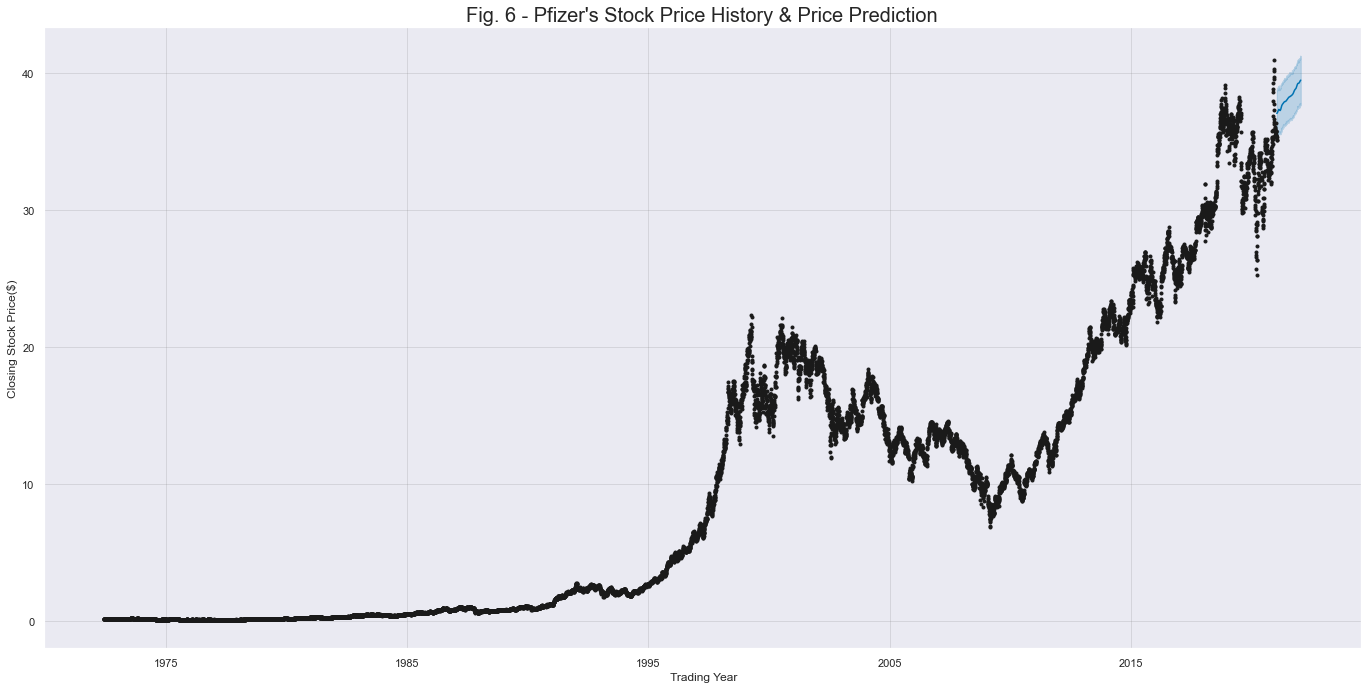

In [25]:
# plotting the historic and predicted price
m.plot(pfizer_pred).set_size_inches(20, 10)
plt.title("Fig. 6 - Pfizer's Stock Price History & Price Prediction",fontsize=20)
plt.xlabel("Trading Year")
plt.ylabel("Closing Stock Price($)")
plt.show()

Here is our first prediction graph, showing that our model forecasted an increase in Pfizer's stock prices for last year (blue line).
The prediction seems reasonable when comparing to how the price did in fact change last year.

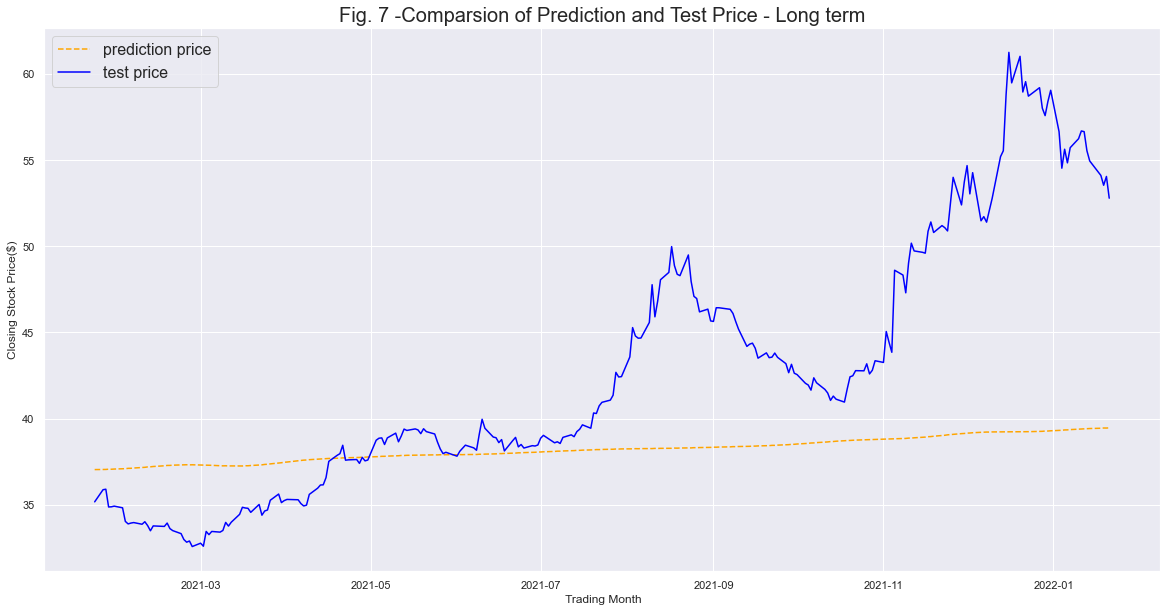

In [26]:
# plotting the real and predicted price fot the last year
f, comparline = plt.subplots(1, 1, figsize=(20, 10))

sns.lineplot(x = 'ds', y = 'yhat',data = pfizer_pred, color = 'orange',linestyle = "--")
sns.lineplot(x = 'ds', y = 'y',data = pfizer_test, color = 'blue')

comparline.set_title("Fig. 7 -Comparsion of Prediction and Test Price - Long term",fontsize = 20)
comparline.set_xlabel(" Trading Month")
comparline.set_ylabel("Closing Stock Price($)")
plt.legend(['prediction price','test price'],prop={"size":16})

However, a deeper dive into the prediction itself shows another perspective. Although the prediction follows the trend of the price, it does not account for the various events that happened this year and, hence, does not predict the volatility of the stock. That is why investors do not intuitively only use machine learning to predict stock prices and follow other traditional and recent forecasting methods when picking stocks.(Ref. Fig. 7)

In [27]:
# calculating root mean squared error between the real and predicted price
long_term_rmse = mean_squared_error(pfizer_pred["yhat"], pfizer_test["y"], squared=False)
long_term_rmse

7.974185267593046

We are using the RMSE as it is a good measure of accuracy to compare prediciton errors of various models. Although the RMSE of about 8% of a price seems reasonable at first glance, it could have a huge impact on the profitability of the stock pick.
We perform short term predictions in the next part to see if it is possible to invest only by analyzing the recent stock prices.

# 4. Short Term Investing

In terms of short-term investing, we focus on stock prices only, and not the company's financial information.

## 4.1. Making Short Term Predictions

In this part, we are going to access the company's stock price every minute for the last week and we will make a prediction for the next 5 minutes. To test the performance of the algorithm, we split the dataset into training and testing, with the test dataset involving data for the last 5 minutes.

In [28]:
# getting the company's stock price every minute for the last week minus the last 5 minutes (used as test data)
pfizer = pfe.history(period = "1wk", interval = "1m")["Close"].reset_index().rename(columns = {"Datetime" : "ds", "Close" : "y"})
# Removing timezone, because Prophet is not able to recognize it
pfizer["ds"] = pfizer["ds"].dt.tz_localize(None)
pfizer

,ds,y
0,2022-01-18 09:30:00,54.384998
1,2022-01-18 09:31:00,54.429001
2,2022-01-18 09:32:00,54.459999
3,2022-01-18 09:33:00,54.490002
4,2022-01-18 09:34:00,54.389999
...,...,...
1553,2022-01-21 15:55:00,52.825001
1554,2022-01-21 15:56:00,52.745499
1555,2022-01-21 15:57:00,52.855000
1556,2022-01-21 15:58:00,52.834999


In [29]:
# getting the company's stock price every minute for the last 5 minutes
pfizer_test = pfe.history(period = "5m", interval = "1m")["Close"].reset_index().rename(columns = {"Datetime" : "ds", "Close" : "y"})
pfizer_test["ds"] = pfizer_test["ds"].dt.tz_localize(None)
pfizer_test

,ds,y
0,2022-01-21 15:55:00,52.825001
1,2022-01-21 15:56:00,52.745499
2,2022-01-21 15:57:00,52.855000
3,2022-01-21 15:58:00,52.834999
4,2022-01-21 15:59:00,52.759998


In [30]:
# getting the company's stock price every minute for the the last 5 minutes
pfizer_train = pfizer[pfizer["ds"] < min(pfizer_test["ds"])]
pfizer_train

,ds,y
0,2022-01-18 09:30:00,54.384998
1,2022-01-18 09:31:00,54.429001
2,2022-01-18 09:32:00,54.459999
3,2022-01-18 09:33:00,54.490002
4,2022-01-18 09:34:00,54.389999
...,...,...
1548,2022-01-21 15:50:00,52.880001
1549,2022-01-21 15:51:00,52.880001
1550,2022-01-21 15:52:00,52.869999
1551,2022-01-21 15:53:00,52.889999


In [31]:
# making the model and setting parameters to exclude weekly and yearly seasonality (as the data concern only one week) and to determine how much the trend changes at the trend changepoints
m = Prophet(weekly_seasonality = False, yearly_seasonality = False, changepoint_prior_scale = 0.4)

In [32]:
# fitting the train data
m.fit(pfizer_train)

In [33]:
# getting the time of the last 5 minutes
last_5_minutes = m.make_future_dataframe(periods = 5, freq = "60S")
last_5_minutes = last_5_minutes[-5:]

#predicting the stock price of the last 5 minutes
pfizer_pred = m.predict(last_5_minutes)
pfizer_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-21 15:55:00,54.319636,52.628556,52.889637,54.319636,54.319636,-1.556587,-1.556587,-1.556587,-1.556587,-1.556587,-1.556587,0.0,0.0,0.0,52.763050
1,2022-01-21 15:56:00,54.320999,52.625177,52.879485,54.320999,54.320999,-1.565700,-1.565700,-1.565700,-1.565700,-1.565700,-1.565700,0.0,0.0,0.0,52.755299
2,2022-01-21 15:57:00,54.322361,52.619984,52.868894,54.322361,54.322361,-1.575305,-1.575305,-1.575305,-1.575305,-1.575305,-1.575305,0.0,0.0,0.0,52.747056
3,2022-01-21 15:58:00,54.323723,52.611181,52.860237,54.323723,54.323723,-1.585419,-1.585419,-1.585419,-1.585419,-1.585419,-1.585419,0.0,0.0,0.0,52.738304
4,2022-01-21 15:59:00,54.325086,52.596963,52.853955,54.325086,54.325086,-1.596059,-1.596059,-1.596059,-1.596059,-1.596059,-1.596059,0.0,0.0,0.0,52.729027


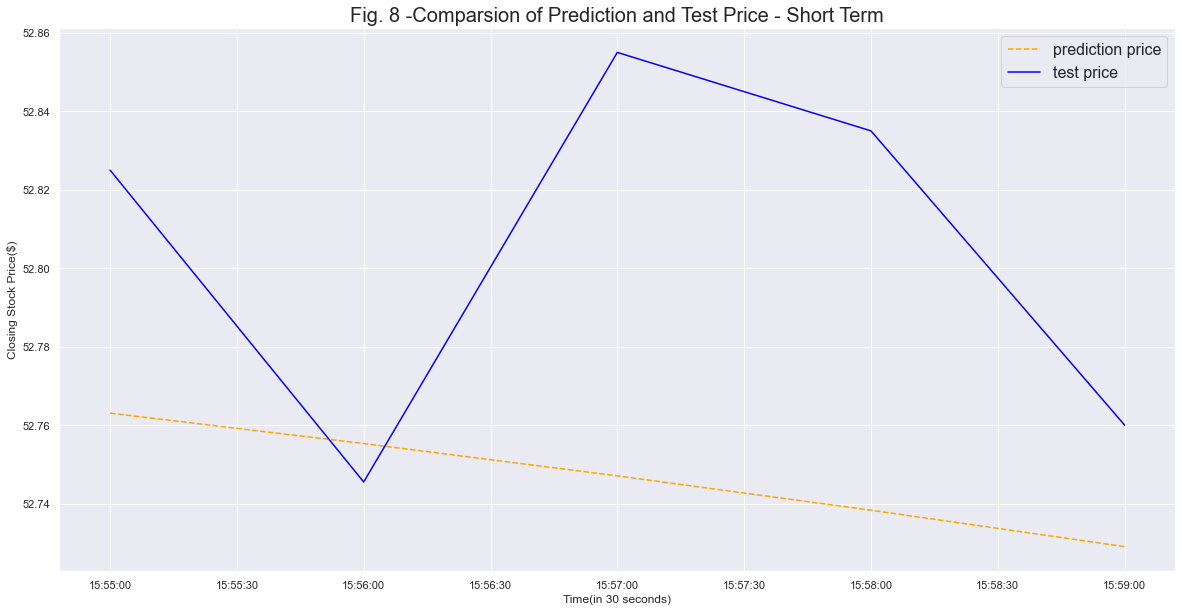

In [34]:
# plotting the real and predicted price fot the last 5 minutes

f, comparline2 = plt.subplots(1, 1, figsize=(20, 10))

sns.lineplot(x = 'ds', y = 'yhat',data = pfizer_pred, color = 'orange',linestyle = "--")
sns.lineplot(x = 'ds', y = 'y', data = pfizer_test, color = "blue" )

comparline2.set_title("Fig. 8 -Comparsion of Prediction and Test Price - Short Term",fontsize = 20)
comparline2.set_xlabel("Time(in 30 seconds)")
comparline2.set_ylabel("Closing Stock Price($)")
plt.legend(['prediction price','test price'],prop={"size":16})

As seen before in long-term, the prediction follows the trend of the price, but does not predict the volatility of the stock.

In [35]:
# calculating root mean squared error between the real and predicted price
short_term_rmse = mean_squared_error(pfizer_pred["yhat"], pfizer_test["y"], squared=False)
short_term_rmse

0.07196532303977245

The short-term root mean squared error in short-term predicting is, as expected, very small compared to the one in long-term predicting.
Stock prices are affected by many external factors like performance of competitors or world affairs that we cannot all take into account in our models.

## 4.2. Investing in the Worst(!) Performing Stocks

In this section we will find out if stocks that underperform for the last minutes are more likely to overperform in the next one.

### 4.2.1. Finding the Worst Performing Stock

We first identify the worst perfoming health care company in the S&P index.

In [36]:
# web scraping the s&p companies from wikipedia
sp = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We are only interested in the health care sector
sp_healthcare = sp[sp["GICS Sector"] == "Health Care"]
sp_healthcare

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
18,ALGN,Align Technology,reports,Health Care,Health Care Supplies,"San Jose, California",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
475,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
485,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
489,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [37]:
# extracting the tickers of health care companies
healthcare_tickers = sp_healthcare['Symbol'].values.tolist()

# accessing their prices for the last 5 minutes
healthcare_companies = yf.download(healthcare_tickers, period = "6M", interval = "1M")["Close"].transpose()
healthcare_companies.head()

[*********************100%***********************]  64 of 64 completed


Datetime,2022-01-21 15:54:00-05:00,2022-01-21 15:55:00-05:00,2022-01-21 15:56:00-05:00,2022-01-21 15:57:00-05:00,2022-01-21 15:58:00-05:00,2022-01-21 15:59:00-05:00
A,137.895004,138.130005,137.729996,137.914993,138.104996,137.520004
ABBV,132.059998,132.100006,131.880005,131.970001,132.089996,131.919998
ABC,131.309998,131.580002,131.419998,131.660004,131.750000,131.419998
ABMD,304.674988,305.019989,304.809998,304.750000,304.869995,304.570007
ABT,125.989998,125.889999,125.775002,126.195000,126.120003,125.790001


In [38]:
# renaming the columns
healthcare_companies.columns = ["p5", "p4", "p3", "p2", "p1", "p0"]
healthcare_companies.head()

,p5,p4,p3,p2,p1,p0
A,137.895004,138.130005,137.729996,137.914993,138.104996,137.520004
ABBV,132.059998,132.100006,131.880005,131.970001,132.089996,131.919998
ABC,131.309998,131.580002,131.419998,131.660004,131.750000,131.419998
ABMD,304.674988,305.019989,304.809998,304.750000,304.869995,304.570007
ABT,125.989998,125.889999,125.775002,126.195000,126.120003,125.790001


In [39]:
# calculating the return for each of the last 5 minutes
healthcare_companies["return_5m"] = 100 * (healthcare_companies["p4"] - healthcare_companies["p5"]) / healthcare_companies["p5"]
healthcare_companies["return_4m"] = 100 * (healthcare_companies["p3"] - healthcare_companies["p4"]) / healthcare_companies["p4"]
healthcare_companies["return_3m"] = 100 * (healthcare_companies["p2"] - healthcare_companies["p3"]) / healthcare_companies["p3"]
healthcare_companies["return_2m"] = 100 * (healthcare_companies["p1"] - healthcare_companies["p2"]) / healthcare_companies["p2"]
healthcare_companies["return_1m"] = 100 * (healthcare_companies["p0"] - healthcare_companies["p1"]) / healthcare_companies["p1"]

# calculating an index to evaluate their performance, giving more weight to the latest minutes
healthcare_companies["performance_index"] = 5 * healthcare_companies["return_1m"] + 4 * healthcare_companies["return_2m"] + 3 * healthcare_companies["return_3m"] + 2 * healthcare_companies["return_4m"] + healthcare_companies["return_5m"]
healthcare_companies.head()

,p5,p4,p3,p2,p1,p0,return_5m,return_4m,return_3m,return_2m,return_1m,performance_index
A,137.895004,138.130005,137.729996,137.914993,138.104996,137.520004,0.170420,-0.289589,0.134319,0.137768,-0.423585,-1.572653
ABBV,132.059998,132.100006,131.880005,131.970001,132.089996,131.919998,0.030296,-0.166541,0.068241,0.090926,-0.128699,-0.377853
ABC,131.309998,131.580002,131.419998,131.660004,131.750000,131.419998,0.205624,-0.121602,0.182625,0.068355,-0.250476,-0.468664
ABMD,304.674988,305.019989,304.809998,304.750000,304.869995,304.570007,0.113236,-0.068845,-0.019684,0.039375,-0.098399,-0.417998
ABT,125.989998,125.889999,125.775002,126.195000,126.120003,125.790001,-0.079370,-0.091348,0.333928,-0.059429,-0.261657,-0.806284


In [40]:
# sorting the companies based on that index. There are some missing values at the bottom of the table, but we only care about the first row
healthcare_companies = healthcare_companies.sort_values("performance_index")
healthcare_companies.head()

,p5,p4,p3,p2,p1,p0,return_5m,return_4m,return_3m,return_2m,return_1m,performance_index
ALGN,463.380005,464.070007,463.549988,464.980011,465.190002,462.399994,0.148906,-0.112056,0.308494,0.045161,-0.599757,-1.967863
ISRG,270.390015,270.359985,269.529999,270.470001,270.829987,269.290009,-0.011106,-0.306993,0.348756,0.133096,-0.568614,-1.889510
ZTS,201.110001,201.244995,200.750000,201.220001,201.289993,200.410004,0.067125,-0.245966,0.234123,0.034784,-0.437175,-1.769180
A,137.895004,138.130005,137.729996,137.914993,138.104996,137.520004,0.170420,-0.289589,0.134319,0.137768,-0.423585,-1.572653
IDXX,502.230011,502.869995,501.795013,503.570007,503.970001,501.399994,0.127428,-0.213769,0.353729,0.079432,-0.509952,-1.470959


In [41]:
# finding the worst performing company
worst_performing_ticker = yf.Ticker(healthcare_companies.index[0])
worst_performing_ticker

yfinance.Ticker object <ALGN>

The best performing company identified by our model at the moment is Merck & Co., an American multinational pharmaceutical firm.

In [42]:
# accessing its price for the last hour
worst_performing_company = worst_performing_ticker.history(period = "60m", interval = "1m")["Close"]
worst_performing_company.head()

Datetime
2022-01-21 15:00:00-05:00    465.808197
2022-01-21 15:01:00-05:00    465.720001
2022-01-21 15:02:00-05:00    465.809998
2022-01-21 15:03:00-05:00    466.350006
2022-01-21 15:04:00-05:00    464.589996
Name: Close, dtype: float64

Text(0.5, 1.0, 'Fig. 9 -Price Trend of Best Performing Company')

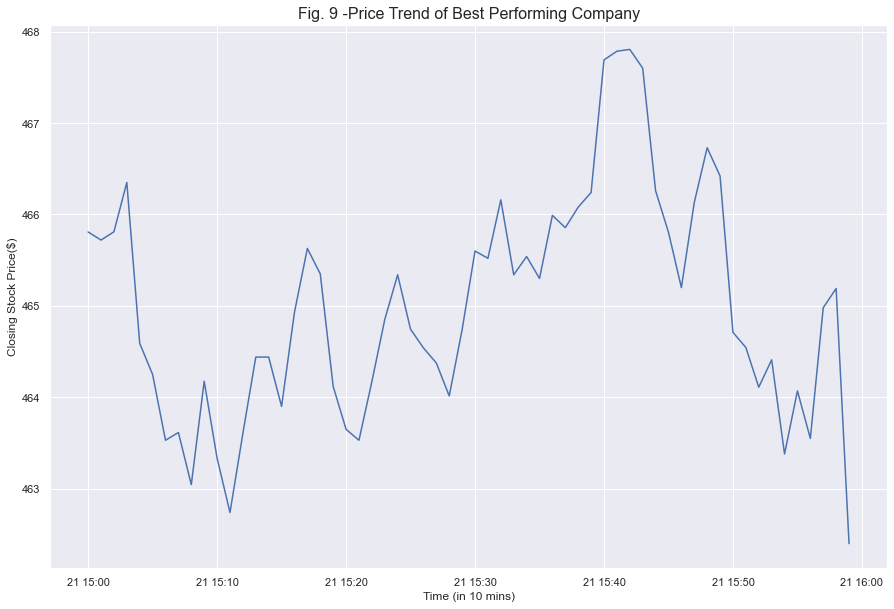

In [43]:
sns.set(rc = {"figure.figsize" : (15, 10)})
worstperform = sns.lineplot(data = worst_performing_company)
worstperform.set_xlabel("Time (in 10 mins)")
worstperform.set_ylabel('Closing Stock Price($)')
worstperform.set_title("Fig. 9 -Price Trend of Best Performing Company",fontsize = 16)

We correctly identified the negative slope at the end. In the next part, we will find out if the price of stocks like this is more likely to go up in the next minute.

### 4.2.2. Backtesting

In this section, we backtest the above method using historical data and get hypothetical results without risking any real capital. We are going to calculate the return we could have in a week if every minute we were holding the stock that performed worst in the last five minutes.

In [44]:
# Accessing the stock prices of all the healthcare companies for every minute in the last week
healthcare_companies = yf.download(healthcare_tickers, period = "1WK", interval = "1M")["Close"].transpose()
healthcare_companies.head()

[*********************100%***********************]  64 of 64 completed


Datetime  2022-01-18 09:30:00-05:00  2022-01-18 09:31:00-05:00  \
A                        141.919998                 141.464996   
ABBV                     135.449997                 135.470001   
ABC                      135.699997                 135.529999   
ABMD                     296.380005                 295.019989   
ABT                      127.169998                 126.760002   

Datetime  2022-01-18 09:32:00-05:00  2022-01-18 09:33:00-05:00  \
A                        140.720001                 141.169998   
ABBV                     135.440002                 135.500000   
ABC                      135.406693                        NaN   
ABMD                     292.679993                 291.329987   
ABT                      126.860001                 127.190002   

Datetime  2022-01-18 09:34:00-05:00  2022-01-18 09:35:00-05:00  \
A                        141.610001                 141.725006   
ABBV                     135.779999                 135.619995   
ABC                      135.050003                 135.065002   
ABMD                            NaN                        NaN   
ABT                      127.129997                 127.059998   

Datetime  2022-01-18 09:36:00-05:00  2022-01-18 09:37:00-05:00  \
A                        141.289993                 141.679993   
ABBV                     135.660004                 135.630005   
ABC                      134.039993                 134.149994   
ABMD                     292.500000                 290.674988   
ABT                      126.900002                 126.745003   

Datetime  2022-01-18 09:38:00-05:00  2022-01-18 09:39:00-05:00  \
A                        141.529999                 141.505005   
ABBV                     135.589996                 135.619995   
ABC                      134.264999                 134.320007   
ABMD                            NaN                 289.989990   
ABT                      126.934998                 126.879997   

Datetime  2022-01-18 09:40:00-05:00  2022-01-18 09:41:00-05:00  \
A                        141.610001                 142.149994   
ABBV                     135.500000                 135.494995   
ABC                      134.494995                 134.330002   
ABMD                     290.989990                 291.739990   
ABT                      126.570000                 126.629997   

Datetime  2022-01-18 09:42:00-05:00  2022-01-18 09:43:00-05:00  \
A                        142.445007                 142.270004   
ABBV                     135.750000                 135.639999   
ABC                      134.770004                 134.653793   
ABMD                     290.269989                        NaN   
ABT                      126.820000                 126.860001   

Datetime  2022-01-18 09:44:00-05:00  2022-01-18 09:45:00-05:00  \
A                        142.419998                 142.259995   
ABBV                     135.520004                 135.699997   
ABC                      134.485001                 134.445007   
ABMD                     290.179993                 290.279999   
ABT                      126.684998                 126.665001   

Datetime  2022-01-18 09:46:00-05:00  2022-01-18 09:47:00-05:00  \
A                        141.710007                 141.660004   
ABBV                     135.289993                 135.482101   
ABC                      134.494995                 134.500000   
ABMD                     288.309998                 289.820007   
ABT                      126.500000                 126.339996   

Datetime  2022-01-18 09:48:00-05:00  2022-01-18 09:49:00-05:00  \
A                        141.660004                 141.580002   
ABBV                     135.539993                 135.550003   
ABC                      134.330002                 134.259995   
ABMD                     290.000000                 290.220001   
ABT                      126.410004                 126.400002   

Datetime  2022-01-18 09:50:00-

In [45]:
# getting the timestamps of the previous dataframe
timestamps = healthcare_companies.columns

tickers = []
performance = []

# finding the worst performing index and its performance for every minute of the last week, starting from the 6th, as we need 5-minute data to calculate the first performance index
for i in range(6, len(timestamps) - 1):
    # calculating the return for each of the previous 5 minutes
    healthcare_companies["return_1m"] = (healthcare_companies[timestamps[i]] - healthcare_companies[timestamps[i-1]]) / healthcare_companies[timestamps[i-1]]
    healthcare_companies["return_2m"] = (healthcare_companies[timestamps[i]] - healthcare_companies[timestamps[i-2]]) / healthcare_companies[timestamps[i-2]]
    healthcare_companies["return_3m"] = (healthcare_companies[timestamps[i]] - healthcare_companies[timestamps[i-3]]) / healthcare_companies[timestamps[i-3]]
    healthcare_companies["return_4m"] = (healthcare_companies[timestamps[i]] - healthcare_companies[timestamps[i-4]]) / healthcare_companies[timestamps[i-4]]
    healthcare_companies["return_5m"] = (healthcare_companies[timestamps[i]] - healthcare_companies[timestamps[i-5]]) / healthcare_companies[timestamps[i-5]]
    
    # calculating an index to evaluate their performance, giving more weight to the latest minutes
    healthcare_companies["performance_index"] = 5 * healthcare_companies["return_1m"] + 4 * healthcare_companies["return_2m"] + 3 * healthcare_companies["return_3m"] + 2 * healthcare_companies["return_4m"] + 1 * healthcare_companies["return_5m"]
    
    # sorting the companies based on that index
    healthcare_companies = healthcare_companies.sort_values("performance_index")
    
    # finding the worst performing ticker
    worst_ticker = healthcare_companies.index[0]
    
    # calculating the return for that ticker for the next minute
    healthcare_companies["return_next_minute"] = (healthcare_companies[timestamps[i+1]] - healthcare_companies[timestamps[i]]) / healthcare_companies[timestamps[i]]
    worst_ticker_next_minute_performance = healthcare_companies.loc[worst_ticker, "return_next_minute"]
    
    # appending the worst ticker for that minute and its performance on the appropriate list
    tickers.append(worst_ticker)
    performance.append(worst_ticker_next_minute_performance)

Here are presented the best performing companies for every minute and their performance

In [46]:
list(zip(tickers, performance))[:20]

[('OGN', 0.00015423494935717203),
 ('MRNA', 0.00044018776813816617),
 ('IQV', -0.0024777652688401466),
 ('IQV', -0.0022769738969531756),
 ('IQV', -8.300527992090249e-05),
 ('INCY', 0.0002675852023034992),
 ('INCY', -0.0017390936912102843),
 ('INCY', -0.00040212285696787506),
 ('OGN', -0.0007739212395209482),
 ('BAX', -0.0004080156397695014),
 ('WAT', nan),
 ('IDXX', -0.0013773462127182347),
 ('DXCM', 0.0026734355345165487),
 ('ALGN', 0.001647709345961531),
 ('ABMD', 0.0017761092685547994),
 ('MRNA', -0.0009681653065286624),
 ('MRNA', 0.0009655235104896977),
 ('ZBH', 0.0026343245780948367),
 ('MRNA', 0.0005969982547121835),
 ('HCA', -0.0020615669130549068)]

Let's now suppose we put £1000 on a virtual machine running on the opening hours of the stock exchange using the above investing strategy.

In [47]:
investment = 1000
revenue = investment

# reinvesting the amount every minute
for i in [j + 1 for j in performance]:
    
    # Filtering out NaN values
    if (np.isnan(i) == False):
        revenue = revenue * i

# calculating the profit
revenue - investment

426.15383243313113

The return of £426 (42.6%) in a week looks extremely promising! And it may also increase even more if we take all the S&P companies, hold stocks for smaller amounts of time, or alter the performance index to maximise the return.

In reality however, we should consider the cost of all these transactions, as the normal transaction cost is around 0.12% per transaction (New York Stock Exchange, 2021).

# 5. Conclusion

The prophet model is simple, efficient but sometimes less accurate especially in long-term prediction.
Moreover, the traditional statistical models are relatively less accurate than machine learning as the statistical models cannot predict some uncontrollable factors from the complexity and diversity of real application scenarios. For example, if there are some sporadic events in our selected data, the intrinsic randomness will not be predictable.

Especially in long-term predictions, the selected dataset will contain more influencial factors beyond control than the dataset in short-term predictions which makes the long-term predictions generally less accurate than short-term prediction, as it has been shown in the work we have done above. This goes in line with common issues that are regularly encountered when making stock predictions.

The method of constantly holding the stocks based on the criteria we set should definitely be tried in reality, and a method for exchanging with minimal costs should be found.

Given more time and resources, we would continue fine-tuning our model and test other time-series models to compare performances.

# 6. References


• Bland, G., (2020). yfinance Library - A Complete Guide - AlgoTrading101 Blog. [online] Available at: [(https://algotrading101.com/learn/yfinance-guide/)] [Accessed 3 Dec. 2021].

• Lander. S., The Nest. (2013). The Disadvantages of High Institutional Ownership Stocks. The Nest [online] Available at: [(https://budgeting.thenest.com/disadvantages-high-institutional-ownership-stocks-32624.html)] [Accessed 10 Dec. 2021].

• New York Stock Exchange. (2021). Price List 2021 [online] Available at: https://www.nyse.com/publicdocs/nyse/markets/nyse/NYSE_Price_List.pdf.

• Štifanić, D., Musulin, J., Miočević, A., Baressi Šegota, S., Šubić, R. and Car, Z. (2020). Impact of COVID-19 on Forecasting Stock Prices: An Integration of Stationary Wavelet Transform and Bidirectional Long Short-Term Memory. Complexity, [online] 2020, pp.1–12. Available at: [(https://www.hindawi.com/journals/complexity/2020/1846926/#conclusion)] [Accessed 3 Dec. 2021].

• Wikipedia Contributors (2021). S&P 500. [online] Wikipedia. Available at: [(https://en.wikipedia.org/wiki/S%26P_500)] [Accessed 10 Dec. 2021].

• Worldometers.info. (2021). COVID Live Update: 270,509,038 Cases and 5,324,275 Deaths from the Coronavirus - Worldometer. [online] Available at: [(https://www.worldometers.info/coronavirus/)] [Accessed 13 Dec. 2021].
